## Daily COVID-19 Cases in the US 

### Import packages, data, cleaning

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DayLocator, DateFormatter, date2num
from matplotlib.ticker import FuncFormatter
from matplotlib import rc
import pandas as pd

In [2]:
corona = pd.read_csv('~/Desktop/code_programming/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

In [3]:
corona.shape

(3340, 284)

In [4]:
# filter data for new cases 3/9/2020 to 10/20/2020
startdate = corona.columns.get_loc("3/9/20")
enddate = len(corona.columns)
covid20 = corona.iloc[:, np.r_[6,startdate:enddate]]

In [5]:
# subsetting data
covid20.rename(columns = {'Province_State': 'State/Territory'}, inplace=True)

cruises = ['Diamond Princess', 'Grand Princess']
for cruise in cruises:
    indexName = covid20[ (covid20['State/Territory'] == cruise)].index
    covid20.drop(indexName, inplace=True)

us_territories = ['Guam', 'Puerto Rico', 'United States Virgin Islands', 'Virgin Islands', 
                  'Northern Mariana Islands', 'American Samoa']
for territory in us_territories:
    indexName = covid20[ (covid20['State/Territory'] == territory)].index
    covid20.drop(indexName, inplace=True)

In [6]:
byState = covid20.groupby(['State/Territory']).sum()
byState

,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,...,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20
State/Territory,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,5,7,11,29,39,51,...,165342,166076,167193,167977,169162,170374,171662,172626,173485,174528
Alaska,0,0,0,0,1,1,1,1,3,5,...,9686,9877,10028,10170,10323,10549,10760,10980,11182,11391
Arizona,4,6,9,9,9,12,12,18,20,27,...,225575,226050,226734,227635,228748,229486,230459,231149,231897,232937
Arkansas,0,0,0,0,9,12,3,3,3,4,...,92833,93487,94167,95246,96524,97539,98422,99066,99597,100441
California,101,144,178,221,281,372,373,557,700,831,...,855190,857913,861310,865204,868148,871253,873614,875692,879645,883746
Colorado,12,17,34,49,78,103,136,161,183,216,...,78437,79013,80061,80753,81895,83207,84346,85279,86351,87559
Connecticut,0,1,3,5,11,23,24,41,68,96,...,60038,61377,61697,61861,62028,62830,62830,62830,64021,64455
Delaware,0,0,1,1,4,6,6,8,16,19,...,22130,22289,22394,22465,22560,22724,22942,23093,23196,23325
District of Columbia,0,0,0,0,0,0,0,22,22,31,...,15984,16022,16068,16132,16166,16255,16334,16370,16395,16445


In [7]:
# transpose data for further manipulation
corona_T = byState.transpose()
corona_T.rename(columns = {'District of Columbia': 'DC'}, inplace=True)
corona_T

# get new daily cases (marginals)
rows = list(corona_T.index)
cols = list(corona_T.columns)
new_rows = rows[1:]

def getMarginalChange(dataframe):
    rows = len(dataframe)
    cols = list(dataframe.columns)
    temp = []
    marginals = []
    for col in cols:
        for row in range(rows-1):
            if row < rows:
                old = dataframe[col][row]
                new = dataframe[col][row+1]
                marginal = new - old
                temp.append(marginal)
        marginals.append(temp)
        temp = []
    return marginals

new_cases = getMarginalChange(corona_T)
new_cases

newCases = {} 
states_newcases = zip(cols, new_cases)
 
for state, marginals in states_newcases:
    newCases[state] = marginals

covid_new = pd.DataFrame(newCases, index=new_rows)
covid_new

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,DC,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
3/10/20,0,0,2,0,43,5,1,0,0,2,...,0,0,3,1,0,6,45,0,3,0
3/11/20,0,0,3,0,34,17,2,1,0,9,...,8,6,5,1,0,1,115,0,1,0
3/12/20,0,0,0,0,43,15,2,0,0,6,...,-1,9,6,0,1,3,160,0,4,1
3/13/20,5,1,0,9,60,29,6,3,0,20,...,1,8,17,6,0,15,126,0,11,0
3/14/20,2,0,3,3,91,25,12,2,0,26,...,0,6,16,1,3,10,74,0,8,1
3/15/20,4,0,0,-9,1,33,1,0,0,24,...,0,0,3,8,0,0,-39,0,1,0
3/16/20,18,0,6,0,184,25,17,2,22,1,...,2,20,22,10,7,12,176,0,20,0
3/17/20,10,2,2,0,143,22,27,8,0,89,...,1,22,25,11,0,18,176,0,25,9
3/18/20,12,2,7,1,131,33,28,3,9,116,...,0,26,86,8,1,12,67,1,38,5
3/19/20,27,3,18,58,178,62,63,11,9,126,...,3,54,110,15,9,24,352,1,48,2


New Confirmed COVID-19 Cases for Select States


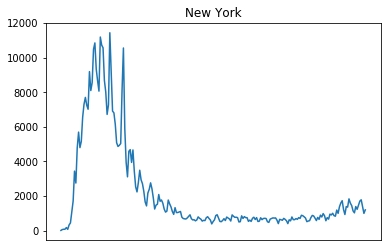

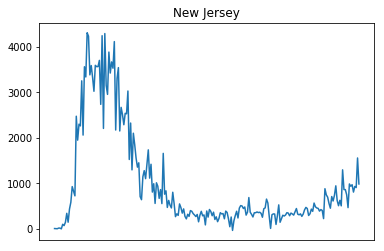

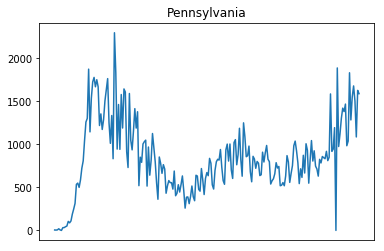

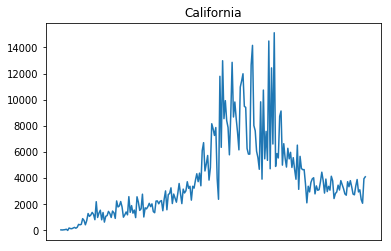

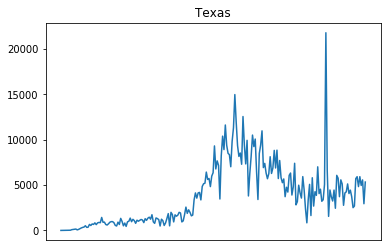

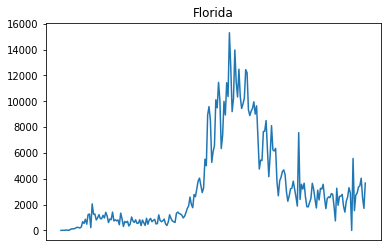

Cumulative Confirmed COVID-19 Cases for Select States


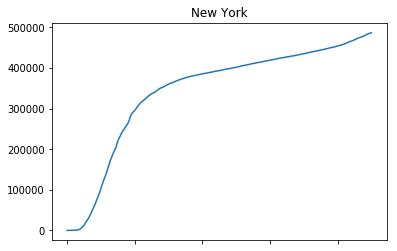

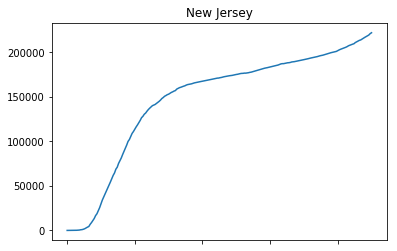

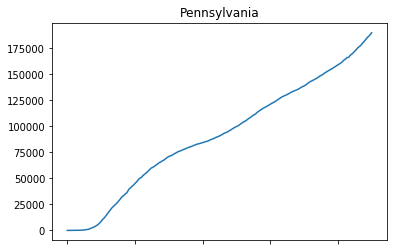

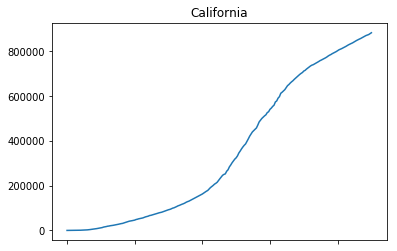

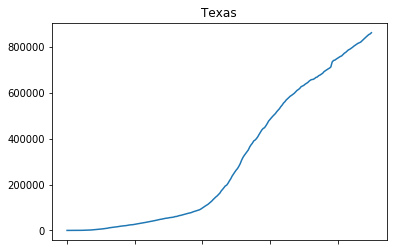

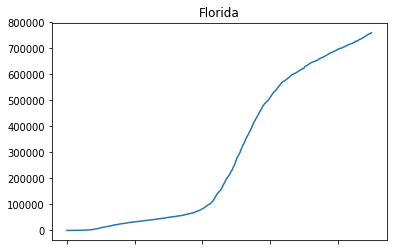

In [21]:
top_states = ['New York', 'New Jersey', 'Pennsylvania', 'California', 'Texas', 'Florida']
print("New Confirmed COVID-19 Cases for Select States")

for state in top_states:
    dates = list(covid_new.index)
    values = covid_new[state]
    
    plt.figure()
    plt.plot(dates, values)
    plt.title(state)
    plt.xticks([])
    plt.show()
    
'''
ax = plt.axes()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)

locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
'''

print("Cumulative Confirmed COVID-19 Cases for Select States")
for state in top_states:
    plt.figure()
    corona_T[state].plot()
    plt.title(state)
plt.show()


"\ni = 3\nj = 2\n\nfig, axs = plt.subplots(i, j)\n\nstateFigures = {}\nmappings = [(0,0),(1,0),(2,0),(0,1),(1,1),(2,1)]\nstate_figs = zip(top_states, mappings)\n \nfor s, m in state_figs:\n    stateFigures[s] = m\n\nprint(stateFigures)\n\nfor state in stateFigures:\n    print(state)\n    axs[stateFigures[state][0], stateFigures[state][1]].plot()\nfig.tight_layout()\n\naxs[0, 0].plot(corona_new['New York'])\naxs[0, 0].set_title('New York')\naxs[1, 0].plot(corona_new['New Jersey'])\naxs[1, 0].set_title('New Jersey')\naxs[2, 0].plot(corona_new['Pennsylvania'])\naxs[2, 0].set_title('Pennsylvania')\naxs[0, 1].plot(corona_new['California'])\naxs[0, 1].set_title('California')\naxs[1, 1].plot(corona_new['Texas'])\naxs[1, 1].set_title('Texas')\naxs[2, 1].plot(corona_new['Florida'])\naxs[2, 1].set_title('Florida')\nfig.tight_layout()\n"

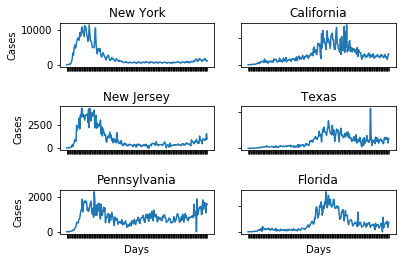

In [29]:
fig, axs = plt.subplots(3, 2,sharex=True)

'''
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0,0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0,1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1,0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1,1]')
'''

axs[0, 0].plot(corona_new['New York'])
axs[0, 0].set_title('New York')
axs[1, 0].plot(corona_new['New Jersey'])
axs[1, 0].set_title('New Jersey')
axs[2, 0].plot(corona_new['Pennsylvania'])
axs[2, 0].set_title('Pennsylvania')
axs[0, 1].plot(corona_new['California'])
axs[0, 1].set_title('California')
axs[1, 1].plot(corona_new['Texas'])
axs[1, 1].set_title('Texas')
axs[2, 1].plot(corona_new['Florida'])
axs[2, 1].set_title('Florida')

for ax in axs.flat:
    ax.set(xlabel='Days', ylabel='Cases')
    ax.set_xticklabels([])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.tight_layout(pad=2.0)    

'''
i = 3
j = 2

fig, axs = plt.subplots(i, j)

stateFigures = {}
mappings = [(0,0),(1,0),(2,0),(0,1),(1,1),(2,1)]
state_figs = zip(top_states, mappings)
 
for s, m in state_figs:
    stateFigures[s] = m

print(stateFigures)

for state in stateFigures:
    print(state)
    axs[stateFigures[state][0], stateFigures[state][1]].plot()
fig.tight_layout()

axs[0, 0].plot(corona_new['New York'])
axs[0, 0].set_title('New York')
axs[1, 0].plot(corona_new['New Jersey'])
axs[1, 0].set_title('New Jersey')
axs[2, 0].plot(corona_new['Pennsylvania'])
axs[2, 0].set_title('Pennsylvania')
axs[0, 1].plot(corona_new['California'])
axs[0, 1].set_title('California')
axs[1, 1].plot(corona_new['Texas'])
axs[1, 1].set_title('Texas')
axs[2, 1].plot(corona_new['Florida'])
axs[2, 1].set_title('Florida')
fig.tight_layout()
'''